# K-means Clustering

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

## Preprocessing

In [2]:
# Loading data

df_labeled = pd.read_csv('train_labeled.csv')
df_unlabeled = pd.read_csv('train_unlabeled.csv')

df_labeled.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Labels
0,0,0,31,0,69571,0,0,1
1,0,0,31,0,93648,1,2,1
2,0,0,42,1,77472,0,0,1
3,1,1,46,2,121501,1,0,0
4,1,1,30,1,207262,1,0,1


In [3]:
# Convert to numpy arrays

X_labeled = df_labeled.drop(['Labels'], axis=1).values
y_labeled = df_labeled['Labels'].values

num_labeled = X_labeled.shape[0]
num_unlabeled = df_unlabeled.shape[0]

X_combined = np.concatenate([X_labeled, df_unlabeled], axis=0)

print(f"Number of labeled datapoints: {num_labeled}")
print(f"Number of unlabeled datapoints: {num_unlabeled}")
print(f"Combined shape: {X_combined.shape}")

Number of labeled datapoints: 50
Number of unlabeled datapoints: 1800
Combined shape: (1850, 7)


## Clustering

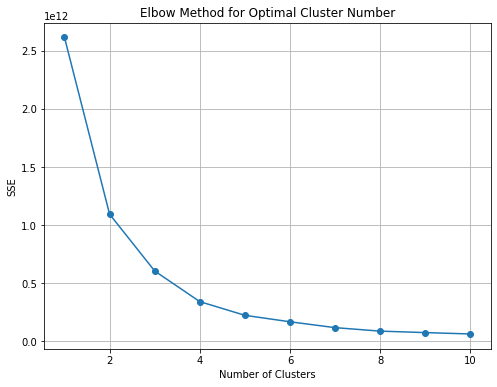

In [4]:
max_clusters = 10
sse = []  # To store SSE values

for n_clusters in range(1, max_clusters + 1):
    # Randomly initialize cluster centers
    np.random.seed(0)
    initial_centers_indices = np.random.choice(X_combined.shape[0], n_clusters, replace=False)
    centers = X_combined[initial_centers_indices]

    # Number of iterations
    max_iters = 100

    for _ in range(max_iters):
        # Assign each data point to the nearest cluster
        distances = np.linalg.norm(X_combined[:, np.newaxis] - centers, axis=2)
        labels = np.argmin(distances, axis=1)

        # Update cluster centers
        new_centers = np.array([X_combined[labels == i].mean(axis=0) for i in range(n_clusters)])

        # Check for convergence
        if np.all(centers == new_centers):
            break

        centers = new_centers

    # Calculate the SSE for this number of clusters
    sse.append(np.sum((X_combined - centers[labels]) ** 2))

# Plot the SSE for each number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_clusters + 1), sse, marker='o')
plt.title('Elbow Method for Optimal Cluster Number')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.grid()
plt.show()

In [5]:
# centers =  #  NumPy array of shape: [n_centers, n_features]
# labels =  #  NumPy array of shape: [n_samples]
n_clusters = 4

# Randomly initialize cluster centers
np.random.seed(0)
initial_centers_indices = np.random.choice(X_combined.shape[0], n_clusters, replace=False)
centers = X_combined[initial_centers_indices]

# Number of iterations
max_iters = 100

for _ in range(max_iters):
    # Assign each data point to the nearest cluster
    distances = np.linalg.norm(X_combined[:, np.newaxis] - centers, axis=2)
    labels = np.argmin(distances, axis=1)

    # Update cluster centers
    new_centers = np.array([X_combined[labels == i].mean(axis=0) for i in range(n_clusters)])

    # Check for convergence
    if np.all(centers == new_centers):
        break

    centers = new_centers

## Classification

In [6]:
# Discard the labels of the unlabeled data
labels = labels[:num_labeled]


# Find the number of clusters
num_clusters = len(np.unique(labels))

# Assign the labels
cluster_labels = []

for i in range(num_clusters):
    cluster = y_labeled[labels == i]
    counts = np.bincount(cluster)
    cluster_labels.append(np.argmax(counts))

cluster_labels = np.array(cluster_labels)


print(f"Cluster labels: {cluster_labels}")


Cluster labels: [1 0 0 1]


In [7]:
# Read test data

df_test = pd.read_csv('test_data.csv')
ID = df_test['ID']
X_test = df_test.drop(['ID'], axis=1).values

df_test.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,1,1,1,40,2,136812,1,2
1,2,0,0,36,1,118277,1,1
2,3,0,0,33,1,144597,1,1
3,4,1,1,23,1,106043,1,0
4,5,0,0,63,2,272314,2,2


In [8]:
# Predict labels for test data

# X_test: (n_samples, n_features)
# cluster_centers: (n_clusters, n_features)

# Find the nearest cluster center for each test data point
distances = np.linalg.norm(X_test[:, None, :] - centers[None], axis=-1) # (n_samples, n_clusters)

# Find the nearest cluster center for each test data point
labels = np.argmin(distances, axis=-1) # (n_samples,)

# Map cluster labels to predicted labels
predicted_labels = cluster_labels[labels]

In [9]:
predicted_labels

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0], dtype=int64)